In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generator liczb pseudolosowych z rozkładu normalnego metodą Boxa-Mullera
def box_muller(n):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z0, z1

# Funkcja analityczna rozkładu normalnego
def normal_distribution(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

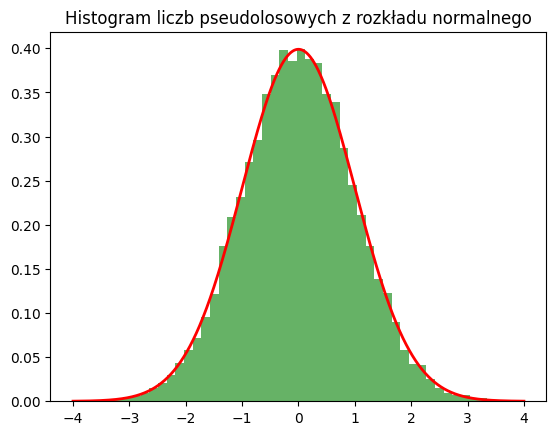

In [2]:
# Generowanie liczb i rysowanie histogramu
n = 10000
z0, z1 = box_muller(n)
data = np.concatenate((z0, z1))

plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Rysowanie funkcji analitycznej
x = np.linspace(-4, 4, 1000)
plt.plot(x, normal_distribution(x), linewidth=2, color='r')
plt.title('Histogram liczb pseudolosowych z rozkładu normalnego')
plt.show()

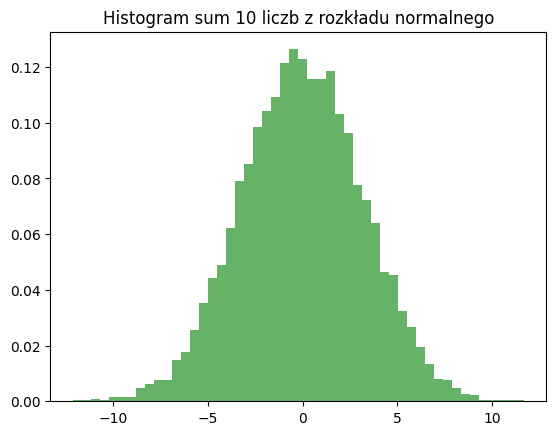

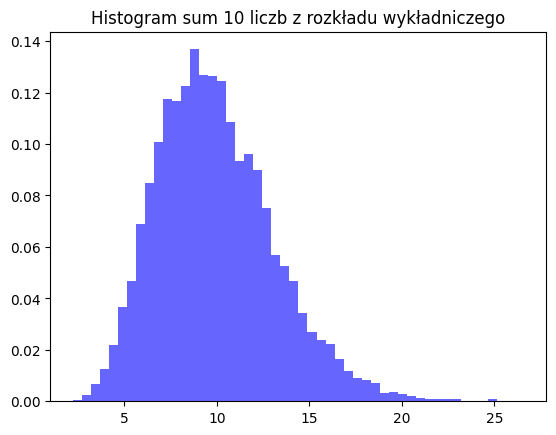

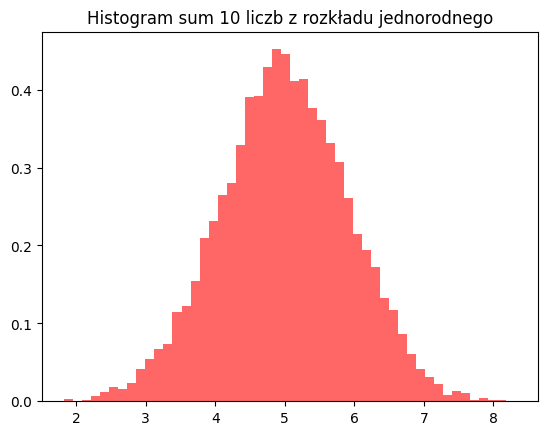

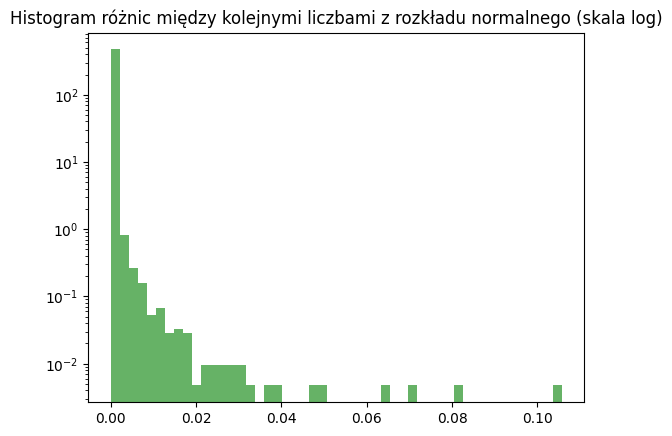

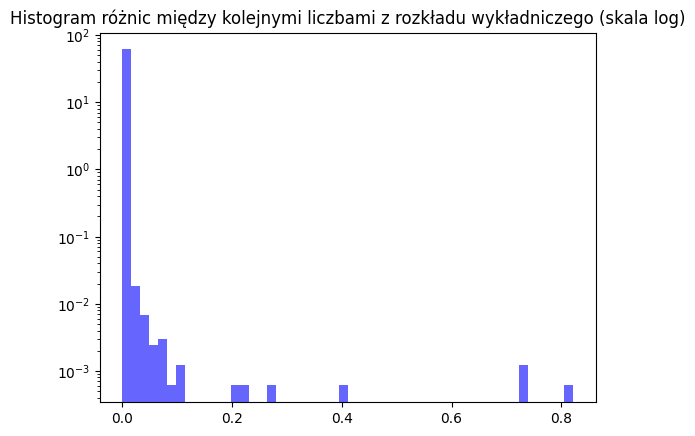

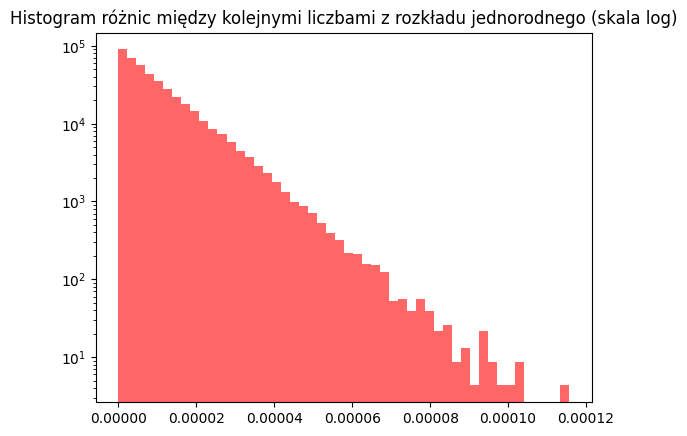

In [3]:
def generate_sums(distribution, n, k):
    if distribution == 'normal':
        data = np.random.randn(n, k)
    elif distribution == 'exponential':
        data = np.random.exponential(1, (n, k))
    elif distribution == 'uniform':
        data = np.random.uniform(0, 1, (n, k))
    return np.sum(data, axis=1)

# Generowanie liczb i rysowanie histogramu sum
n = 10000
k = 10

# Normalny
sums_normal = generate_sums('normal', n, k)
plt.hist(sums_normal, bins=50, density=True, alpha=0.6, color='g')
plt.title('Histogram sum 10 liczb z rozkładu normalnego')
plt.show()

# Wykładniczy
sums_exponential = generate_sums('exponential', n, k)
plt.hist(sums_exponential, bins=50, density=True, alpha=0.6, color='b')
plt.title('Histogram sum 10 liczb z rozkładu wykładniczego')
plt.show()

# Jednorodny
sums_uniform = generate_sums('uniform', n, k)
plt.hist(sums_uniform, bins=50, density=True, alpha=0.6, color='r')
plt.title('Histogram sum 10 liczb z rozkładu jednorodnego')
plt.show()

# Generowanie bardzo dużej liczby liczb pseudolosowych
large_n = 100000

# Normalny
data_normal = np.random.randn(large_n)
data_normal.sort()
diffs_normal = np.diff(data_normal)
plt.hist(diffs_normal, bins=50, density=True, alpha=0.6, color='g')
plt.yscale('log')
plt.title('Histogram różnic między kolejnymi liczbami z rozkładu normalnego (skala log)')
plt.show()

# Wykładniczy
data_exponential = np.random.exponential(1, large_n)
data_exponential.sort()
diffs_exponential = np.diff(data_exponential)
plt.hist(diffs_exponential, bins=50, density=True, alpha=0.6, color='b')
plt.yscale('log')
plt.title('Histogram różnic między kolejnymi liczbami z rozkładu wykładniczego (skala log)')
plt.show()

# Jednorodny
data_uniform = np.random.uniform(0, 1, large_n)
data_uniform.sort()
diffs_uniform = np.diff(data_uniform)
plt.hist(diffs_uniform, bins=50, density=True, alpha=0.6, color='r')
plt.yscale('log')
plt.title('Histogram różnic między kolejnymi liczbami z rozkładu jednorodnego (skala log)')
plt.show()

In [7]:
import time

# Metoda eliminacji/akceptacji
def rejection_sampling(n):
    accepted = 0
    total_points = 0
    samples = []
    start_time = time.time()
    while accepted < n:
        u1 = np.random.rand()
        u2 = np.random.rand()
        x = -np.log(u1)
        total_points += 1
        if u2 <= np.exp(-0.5 * x**2):
            samples.append(x)
            accepted += 1
    end_time = time.time()
    percentage = (accepted / total_points) * 100
    return samples, (end_time - start_time), percentage

# Metoda hit-and-miss
def hit_and_miss(n):
    accepted = 0
    samples = []
    total_points = 0
    start_time = time.time()
    while accepted < n:
        u1 = np.random.rand()
        u2 = np.random.rand()
        total_points += 1
        if u2 <= np.exp(-0.5 * u1**2):
            samples.append(u1)
            accepted += 1
    end_time = time.time()
    percentage = (accepted / total_points) * 100
    return samples, (end_time - start_time), percentage

# Symulacja metodą eliminacji/akceptacji
n = 10000
samples_rejection, time_rejection, percentage_rejection = rejection_sampling(n)
print(f"Metoda eliminacji/akceptacji: {len(samples_rejection)} punktów zaakceptowanych, czas: {time_rejection:.4f} sekund, procentowy udział: {percentage_rejection:.2f}%")

# Symulacja metodą hit-and-miss
samples_hit_miss, time_hit_miss, percentage_hit_miss = hit_and_miss(n)
print(f"Metoda hit-and-miss: {len(samples_hit_miss)} punktów zaakceptowanych, czas: {time_hit_miss:.4f} sekund, procentowy udział: {percentage_hit_miss:.2f}%")

Metoda eliminacji/akceptacji: 10000 punktów zaakceptowanych, czas: 0.0465 sekund, procentowy udział: 65.25%
Metoda hit-and-miss: 10000 punktów zaakceptowanych, czas: 0.0220 sekund, procentowy udział: 85.87%


In [9]:
# Funkcja Lorentza
def lorentzian(x):
    return 1 / (np.pi * (x**2 + 1))

# Wyznaczenie stałej C
C = 1 / lorentzian(0)  # Maksymalna wartość funkcji Lorentza

# Metoda hybrydowej eliminacji/akceptacji
def hybrid_rejection_sampling(n):
    accepted = 0
    total_points = 0
    samples = []
    start_time = time.time()
    while accepted < n:
        u1 = np.random.rand()
        u2 = np.random.rand()
        x = np.tan(np.pi * (u1 - 0.5))
        total_points += 1
        if u2 <= np.exp(-0.5 * x**2) / (C * lorentzian(x)):
            samples.append(x)
            accepted += 1
    end_time = time.time()
    percentage = (accepted / total_points) * 100
    return samples, (end_time - start_time), percentage

# Metoda hit-and-miss
def hit_and_miss(n):
    accepted = 0
    samples = []
    total_points = 0
    start_time = time.time()
    while accepted < n:
        u1 = np.random.rand()
        u2 = np.random.rand()
        total_points += 1
        if u2 <= np.exp(-0.5 * u1**2):
            samples.append(u1)
            accepted += 1
    end_time = time.time()
    percentage = (accepted / total_points) * 100
    return samples, (end_time - start_time), percentage

# Symulacja metodą hybrydowej eliminacji/akceptacji
n = 10000
samples_hybrid, time_hybrid, percentage_hybrid = hybrid_rejection_sampling(n)
print(f"Metoda hybrydowej eliminacji/akceptacji: {len(samples_hybrid)} punktów zaakceptowanych, czas: {time_hybrid:.4f} sekund, procentowy udział: {percentage_hybrid:.2f}%")

# Symulacja metodą hit-and-miss
samples_hit_miss, time_hit_miss, percentage_hit_miss = hit_and_miss(n)
print(f"Metoda hit-and-miss: {len(samples_hit_miss)} punktów zaakceptowanych, czas: {time_hit_miss:.4f} sekund, procentowy udział: {percentage_hit_miss:.2f}%")

Metoda hybrydowej eliminacji/akceptacji: 10000 punktów zaakceptowanych, czas: 0.0546 sekund, procentowy udział: 73.42%
Metoda hit-and-miss: 10000 punktów zaakceptowanych, czas: 0.0250 sekund, procentowy udział: 84.91%
